Question 1

In [1]:
#1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
def PCA(X):
    n_samples, n_features = X.shape
    mean = np.array([np.mean(X.iloc[:, i]) for i in range(n_features)])
    norm_X = X - mean

    corr_matrix = X.corr()
    eig_val, eig_vec = np.linalg.eig(corr_matrix)
    
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    eig_vec =  eig_vec[idx]
    loading_matrix = eig_vec
    score_matrix = np.dot(X, loading_matrix)
    idx = [str(i + 1) for i in idx]
    sum_eig = 0
    explain_var = eig_val / np.sum(eig_val)
    cum_explain_var = np.cumsum(explain_var)
    
    return idx, explain_var, cum_explain_var, loading_matrix, eig_val, score_matrix

In [3]:
def FA(X, n_factors):
    n_samples, n_features = X.shape
    # normalize
    mean = np.array([np.mean(X.iloc[:, i]) for i in range(n_features)])
    norm_X = X - mean
    # loading_matrix
    idx, explain_var, cum_explain_var, loading_matrix, eig_val, score_matrix = PCA(X)
    
    loading_matrix = loading_matrix[:, :n_factors]
    idx = idx[:n_factors]
    F = np.dot(X, loading_matrix)
    communalities = np.sum(loading_matrix**2, axis=1)
    unique_variances = 1 - communalities
    variance = eig_val[:n_factors] / np.sum(eig_val)
    
    cum_variance = np.cumsum(variance)
    
    print('the loading matrix A : ', loading_matrix)
    print('the factor matrix F : ', F)
    print('the communality vector of ℎ𝑖2 : ', communalities)
    print('the uniqueness vector of 𝜓: ', unique_variances)
    print('the vector of the proportions of total variance contributed by the ith factor : ', variance)
     
    return idx, variance, cum_variance

In [4]:
mpg = open("D:/Anna/Anna/fourth2/analysis/HW3/auto-mpg_data.txt")
df = pd.DataFrame(columns = ['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
mpg_list = []
cars = []
for i in mpg:
    a = i.split("\'")
    mpg_list.append(a[0])
    
for data in mpg_list:
    data = data.split("\"")
    cars.append(data)

for c in cars:
    nums = c[0].strip("\t")
    nums = nums.split(" ")
    informations = []
    informations.append(c[1])
    for n in nums:
        if n != " " and n != "" and n != "?":
            try:
                informations.append(int(n))
            except ValueError:
                informations.append(float(n))
        if n == "?":
            informations.append(np.nan)
    df.loc[len(df)] = informations
df.set_index('car name', inplace = True)

# fill the ? number with mean
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
mpg_df = df['mpg']
df = df.drop(['mpg'], axis = 1)

In [5]:
#print FA
idx, variance, cum_variance = FA(df, 2)

the loading matrix A :  [[ 0.43862683  0.11407739]
 [ 0.45396453  0.10535161]
 [ 0.43706212 -0.13929117]
 [ 0.43230831  0.20307205]
 [-0.29765673  0.48625222]
 [-0.2981132  -0.5246669 ]
 [-0.21479741  0.63524052]]
the factor matrix F :  [[1689.84792074  696.45576855]
 [1806.52066899  734.24818868]
 [1674.48346463  680.53366102]
 [1666.53337948  678.93577451]
 [1668.61824728  682.63775752]
 [2137.38918755  868.83566917]
 [2164.27133231  870.55873813]
 [2137.72239755  861.0081191 ]
 [2197.30684077  884.87200185]
 [1904.37117833  765.40352945]
 [1767.93321395  709.89959081]
 [1764.52361352  715.1311932 ]
 [1852.65524252  754.441532  ]
 [1618.44601287  612.95852322]
 [1094.0315469   453.28811131]
 [1333.07068365  555.0600145 ]
 [1308.8925821   542.90553265]
 [1223.11131875  506.95103059]
 [ 979.23889671  403.19096085]
 [ 831.78019308  351.41720737]
 [1218.3363051   515.58839172]
 [1114.55995689  464.25226993]
 [1090.7134466   453.52955301]
 [1046.83077371  421.74886874]
 [1251.51112849  51

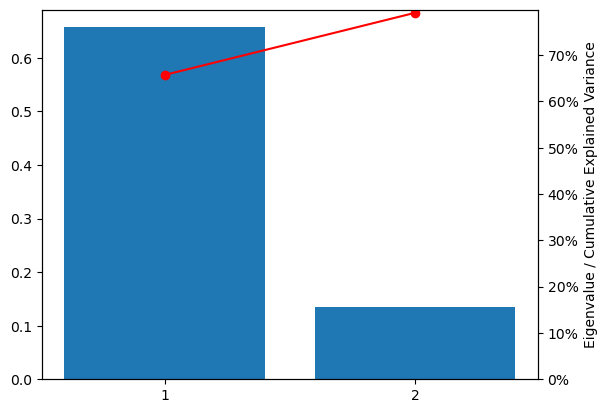

In [6]:
fig, ax = plt.subplots()
ax.bar(idx, variance)
ax.set_ylim(ymin = 0)

ax2 = ax.twinx()
ax2.plot(idx, cum_variance, 'ro-')
ax2.set_ylim(ymin = 0)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue / Cumulative Explained Variance')
plt.show()

the loading matrix :  [[ 0.43862683  0.11407739 -0.02634794 -0.24370468 -0.68491672  0.45261713
  -0.24603555]
 [ 0.45396453  0.10535161 -0.02428128 -0.16138957 -0.17977894 -0.84975536
  -0.04214764]
 [ 0.43706212 -0.13929117 -0.17683559 -0.11617996  0.61194248  0.14321108
  -0.5914584 ]
 [ 0.43230831  0.20307205  0.00510785 -0.33523041  0.31622223  0.21724932
   0.71573178]
 [-0.29765673  0.48625222  0.55053864 -0.53307937  0.13422769 -0.02860109
  -0.26240759]
 [-0.2981132  -0.5246669  -0.34533416 -0.70981357 -0.07505502 -0.06634103
   0.05222826]
 [-0.21479741  0.63524052 -0.73828912 -0.02598658  0.02117057 -0.0113014
  -0.06332078]]
the eigenvalue value :  [4.5991203  0.93958676 0.7485441  0.4808644  0.13449236 0.06368245
 0.03370963]
the score matrix :  [[1689.84792074  696.45576855  -31.06107865 ... 1123.30179723
   517.60671462 2416.57071936]
 [1806.52066899  734.24818868  -37.60430541 ... 1196.68817725
   527.15404411 2529.46183686]
 [1674.48346463  680.53366102  -35.76275693 .

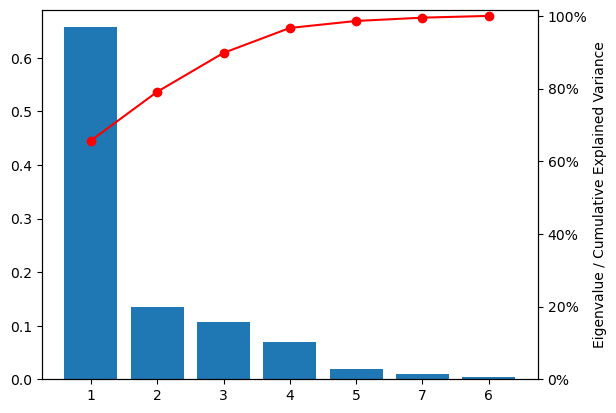

In [7]:
# print PCA
idx_pca, explain_var_pca, cum_explain_var_pca, loading_matrix_pca, eig_val_pca, score_matrix_pca = PCA(df)

print('the loading matrix : ', loading_matrix_pca)
print('the eigenvalue value : ', eig_val_pca)
print('the score matrix : ', score_matrix_pca)

fig, ax = plt.subplots()
ax.bar(idx_pca, explain_var_pca)
ax.set_ylim(ymin = 0)

ax2 = ax.twinx()
ax2.plot(idx_pca, cum_explain_var_pca, 'ro-')
ax2.set_ylim(ymin = 0)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue / Cumulative Explained Variance')
plt.show()

只用兩個factor無法到達100%的解釋率，但有到80%，可以更有效的降維

Question 2

In [8]:
# 2
import cv2
import os
import numpy as np
import pandas as pd

array_of_img = []
file_names = []
gender_labels = []
def read_directory(directory_name):
    for filename_1 in range(1, 41):
        for filename_2 in range(1, 11): 
            img = cv2.imread(directory_name + "/" + str(filename_1) + '_' + str(filename_2) + ".png", 0)
            if filename_1 in [1, 8, 10, 32]:
                gender_labels.append(0)
            else:
                gender_labels.append(1)
            array_of_img.append(img)
    arr = np.array(array_of_img)
    arr = arr.reshape(400, 2576)
    data = pd.DataFrame(arr)
    data['gender'] = [g for g in gender_labels]
    return arr, gender_labels, data

arr, gender_labels, data = read_directory("D:/Anna/Anna/fourth2/analysis/HW2/ORL Faces")

In [9]:
def FA_q2(X, n_factors):
    X = np.transpose(X)
    n_samples, n_features = X.shape
    # normalize
    mean = np.array([np.mean(X.iloc[:, i]) for i in range(n_features)])
    norm_X = X - mean
    # loading_matrix
    idx, explain_var, cum_explain_var, loading_matrix, eig_val, score_matrix = PCA(X)
    
    loading_matrix = loading_matrix[:, :n_factors]
    idx = idx[:n_factors]
    F = np.dot(X, loading_matrix)
    communalities = np.sum(loading_matrix**2, axis=1)
    unique_variances = 1 - communalities
    variance = eig_val[:n_factors] / np.sum(eig_val)
    
    cum_variance = np.cumsum(variance)
    
    time = 0
    while time < 50:
        count = 0
        for i in range(len(cum_variance)):
            if cum_variance[i] > 0.5 + (time / 10):
                print('when explaining ', (0.5 + (time / 10)) * 100, 'percents we need ', i, ' factors')
                break
        time += 1
    F = F.astype(float)
    img = F[:, 0]
    img *= 255.0 / img.max()
    img = img.reshape(56, 46)
    plt.gray()
    plt.imshow(img)
    
    
    return X, eig_val

when explaining  50.0 percents we need  1  factors
when explaining  60.0 percents we need  3  factors
when explaining  70.0 percents we need  6  factors
when explaining  80.0 percents we need  16  factors
when explaining  90.0 percents we need  49  factors


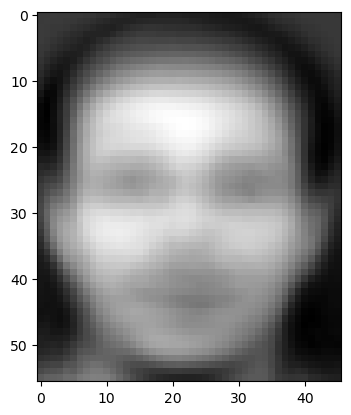

In [10]:
arr = pd.DataFrame(arr)
fa, eig_val = FA_q2(arr, 100)

Question 3

when number of components are  1 , the mse is  13.261713324382598
when number of components are  1 , the r2 is  0.7666157398699953
-------------------------------------------------------------
when number of components are  2 , the mse is  10.848781620341432
when number of components are  2 , the r2 is  0.8090793542399806
-------------------------------------------------------------
when number of components are  3 , the mse is  9.9374294637034
when number of components are  3 , the r2 is  0.8251176476031614
-------------------------------------------------------------
when number of components are  4 , the mse is  9.679660784053969
when number of components are  4 , the r2 is  0.8296539508026932
-------------------------------------------------------------
when number of components are  5 , the mse is  9.613547143048631
when number of components are  5 , the r2 is  0.8308174417343033
-------------------------------------------------------------
when number of components are  6 , the m

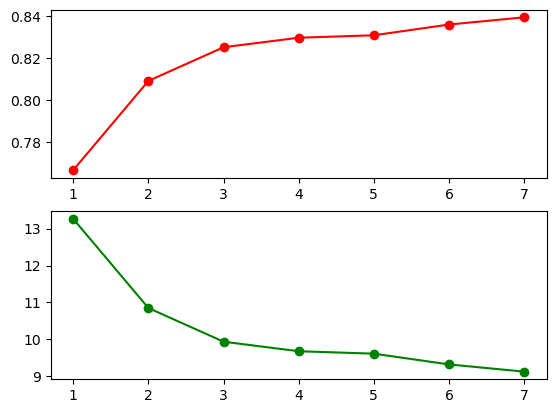

In [11]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(df, mpg_df, train_size=0.754, random_state=42)

mses = []
r2s = []
idx = [1, 2, 3, 4, 5, 6, 7]

for i in range(1, 8):
    PLSR = PLSRegression(n_components=i)
    PLSR.fit(X_train, y_train)
    pred = PLSR.predict(X_test)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2s.append(r2)
    mses.append(mse)
    print("when number of components are ",i, ", the mse is " ,mse)
    print("when number of components are ",i, ", the r2 is " ,r2)
    print("-------------------------------------------------------------")

fig, ax = plt.subplots(2)
ax[0].plot(idx, r2s, 'ro-')
ax[1].plot(idx, mses, 'go-')
plt.show()

It has a better performance with a higher number of components.

In [12]:
# 2
modelyear = df['model year']
df_2 = df.drop(['model year'], axis = 1)
y_q4 = pd.concat([mpg_df, modelyear], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_2, y_q4, train_size=0.754, random_state=42)

when number of components are  1 , the mse is  15.654020692282549
when number of components are  1 , the r2 is  0.8393776562317445
-------------------------------------------------------------
when number of components are  2 , the mse is  15.534158113918863
when number of components are  2 , the r2 is  0.8393776562317445
-------------------------------------------------------------
when number of components are  3 , the mse is  15.332785575239246
when number of components are  3 , the r2 is  0.8393776562317445
-------------------------------------------------------------
when number of components are  4 , the mse is  14.894978313771176
when number of components are  4 , the r2 is  0.8393776562317445
-------------------------------------------------------------
when number of components are  5 , the mse is  14.79444401271267
when number of components are  5 , the r2 is  0.8393776562317445
-------------------------------------------------------------
when number of components are  6 , t

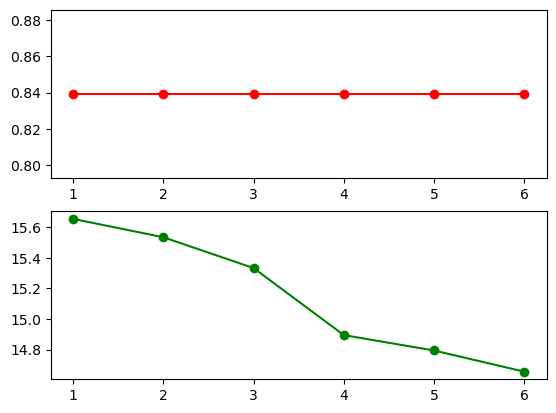

In [14]:
r2s = []
mses = []
idx = [1, 2, 3, 4, 5, 6]

for i in range(1, 7):
    PLSR = PLSRegression(n_components=i)
    PLSR.fit(X_train, y_train)
    pred = PLSR.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2s.append(r2)
    mses.append(mse)
    print("when number of components are ",i, ", the mse is " ,mse)
    print("when number of components are ",i, ", the r2 is " ,r2)
    print("-------------------------------------------------------------")
    
fig, ax = plt.subplots(2)
ax[0].plot(idx, r2s, 'ro-')
ax[1].plot(idx, mses, 'go-')
plt.show()

y變多樣後準確率就下降了